In [19]:
import pandas as pd
import glob

file_paths = glob.glob('*년_산업_세세분류별_총괄*.csv')
dfs = [pd.read_csv(file, encoding='cp949', header=0) for file in file_paths]
df_merged = pd.concat(dfs, ignore_index=True)

# display(df_merged)
# display(df_merged.shape)

In [20]:
# 필터링할 항목 리스트
filter_items = ['-5~9명[사업체수]', '-10~19명[사업체수]', '-20~49명[사업체수]', 
                '-50~99명[사업체수]', '-100~299명[사업체수]', '-300~499명[사업체수]', '-500~999명[사업체수]', '-1000명시상[사업체수]',
                '종사자규모별-1~4명[사업체수] (개)', '-5~9명[사업체수] (개)', '-10~19명[사업체수] (개)', '-20~49명[사업체수] (개)', 
                '-50~99명[사업체수] (개)', '-100~299명[사업체수] (개)', '-300~499명[사업체수] (개)', '-500~999명[사업체수] (개)', 
                '-1000명이상[사업체수] (개)']

# 데이터프레임 필터링
df_merged.replace('-', 0, inplace=True)
filtered_df = df_merged[df_merged['항목'].isin(filter_items)].fillna(0)

# Remove '-' and '[사업체수]' and '(개)' from '항목' column
filtered_df['항목'] = filtered_df['항목'].str.replace('-', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('[사업체수]', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('(개)', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('종사자규모별', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('1000명시상', '1000명이상', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace(' ', '', regex=False)

# 필터링된 데이터프레임 출력
display(filtered_df)
display(filtered_df.shape)

,시점,항목,전 산 업,농업 임업 및 어업 (01 ~ 03),제조업 (10 ~ 33),전기 가스 증기 및 수도사업 (35 ~ 36),하수 · 폐기물 처리 원료재생 및 환경복원업 (37 ~ 39),건설업 (41 ~ 42),도매 및 소매업(45~47),운수업(49~52),...,J.정보통신업(58~63),K.금융 및 보험업(64~66),L.부동산업(68),M.전문 과학 및 기술 서비스업(70~73),N.사업시설 관리 사업 지원 및 임대 서비스업(74~76),O.공공행정 국방 및 사회보장 행정(84),P.교육 서비스업(85),Q.보건업 및 사회복지 서비스업(86~87),R.예술 스포츠 및 여가관련 서비스업(90~91),S.협회 및 단체 수리 및 기타 개인 서비스업(94~96)
20,2009,5~9명,5895,1,958,0,18,310,1241,119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,2009,10~19명,2347,2,422,1,12,184,408,73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,2009,20~49명,1096,2,179,1,13,80,152,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2009,50~99명,314,0,24,4,0,20,22,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,2009,100~299명,134,0,5,1,2,6,13,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2022,50~99명,472,0,0,0,0,0,0,0,...,9.0,27.0,4.0,22.0,24.0,9.0,115.0,111.0,15.0,7.0
496,2022,100~299명,183,0,0,0,0,0,0,0,...,7.0,4.0,1.0,5.0,15.0,6.0,34.0,31.0,6.0,2.0
498,2022,300~499명,24,0,0,0,0,0,0,0,...,2.0,0.0,0.0,0.0,6.0,7.0,2.0,2.0,0.0,0.0
500,2022,500~999명,9,0,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0


(125, 43)

In [21]:
# 각 행의 2번째 컬럼부터 끝까지의 값을 더한 합계를 새로운 컬럼 '합계'에 추가
numeric_cols = filtered_df.select_dtypes(include='number').columns
filtered_sum_df = filtered_df[['시점', '항목', '전 산 업']]

# 필터링된 데이터프레임 출력
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(filtered_sum_df)
display(filtered_sum_df.shape)

,시점,항목,전 산 업
20,2009,5~9명,5895
22,2009,10~19명,2347
24,2009,20~49명,1096
26,2009,50~99명,314
28,2009,100~299명,134
30,2009,300~499명,13
32,2009,500~999명,11
34,2009,1000명이상,2
54,2010,1~4명,40156
56,2010,5~9명,5311


(125, 3)

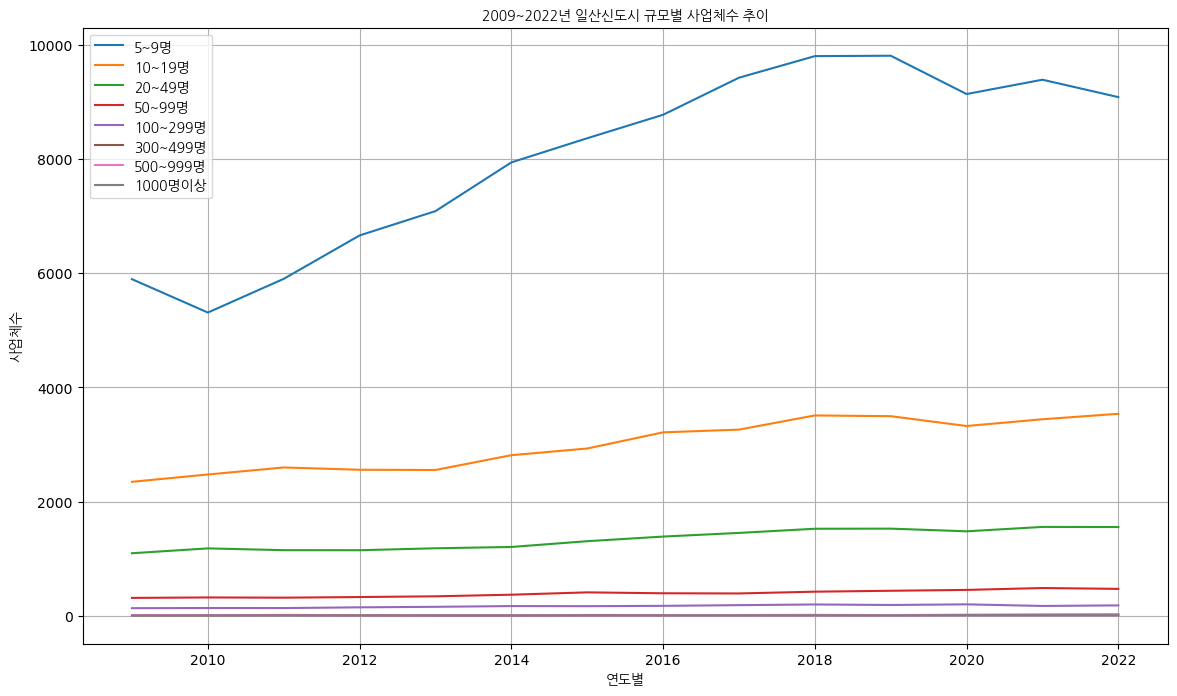

In [22]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontprop = FontProperties(fname='NanumGothic.ttf')

# 데이터프레임 피벗
pivot_df = filtered_sum_df.pivot(index='시점', columns='항목', values='전 산 업')

# Specify the order of columns for the legend
order = ['5~9명', '10~19명', '20~49명', '50~99명', '100~299명', '300~499명', '500~999명', '1000명이상']
pivot_df = pivot_df[order]

# 꺾은선 그래프 그리기
plt.figure(figsize=(14, 8))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.title('2009~2022년 일산신도시 규모별 사업체수 추이', fontproperties=fontprop)
plt.xlabel('연도별', fontproperties=fontprop)
plt.ylabel('사업체수', fontproperties=fontprop)
plt.legend(order, loc='best', prop=fontprop)
plt.grid(True)
plt.show()


In [23]:
import pandas as pd
import glob

file_paths = glob.glob('*산업소분류_및_시도별_사업체수__종사자수*.csv')
dfs = [pd.read_csv(file, encoding='cp949', header=0) for file in file_paths]
df_merged = pd.concat(dfs, ignore_index=True)

# display(df_merged)
# display(df_merged.shape)

In [24]:
# 필터링할 항목 리스트
filter_items = [
    '식사동', '중산동', '정발산동', '풍산동', '백석동', '마두동', '장항동', '일산동',
    '주엽동', '대화동', '탄현동', '식사1동', '식사2동', '중산1동', '중산2동', '정발산1동',
    '정발산2동', '풍산1동', '풍산2동', '백석1동', '백석2동', '마두1동', '마두2동', '장항1동',
    '장항2동', '일산1동', '일산2동', '일산3동', '주엽1동', '주엽2동', '대화1동', '대화2동',
    '탄현1동', '탄현2동'
]

# Convert '항목' column to string type
df_merged.replace('-', 0, inplace=True)
df_merged['항목'] = df_merged['항목'].astype(str)

# 데이터프레임 필터링
filtered_df = df_merged[df_merged['항목'].apply(lambda x: any(item in x for item in filter_items))].fillna(0)
filtered_df = filtered_df[~filtered_df['항목'].str.contains('종사자')]
filtered_df = filtered_df[~filtered_df['항목'].str.contains('(명)')]

filtered_df['항목'] = filtered_df['항목'].str.replace('-', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('사업체수', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('(개)', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('명)(', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('종사자규모별', '', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace('1000명시상', '1000명이상', regex=False)
filtered_df['항목'] = filtered_df['항목'].str.replace(' ', '', regex=False)
filtered_df = filtered_df[~filtered_df['항목'].str.contains('일산동구')]

# 필터링된 데이터프레임 출력
display(filtered_df)
display(filtered_df.shape)

C:\Users\twoimo\AppData\Local\Temp\ipykernel_21784\3287375717.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = filtered_df[~filtered_df['항목'].str.contains('(명)')]


,시점,항목,전 산 업,농업 임업 및 어업 (01 ~ 03),제조업 (10 ~ 33),전기 가스 증기 및 수도사업 (35 ~ 36),하수 · 폐기물 처리 원료재생 및 환경복원업 (37 ~ 39),건설업 (41 ~ 42),도매 및 소매업(45~47),운수업(49~52),...,TT 전체산업.9,TT 전체산업.10,TT 전체산업.11,TT 전체산업.12,TT 전체산업.13,TT 전체산업.14,TT 전체산업.15,TT 전체산업.16,TT 전체산업.17,TT 전체산업.18
44,2009,식사동,1115,1,223.0,0,5,28.0,284.0,353.0,...,0,0,0,0,0,0,0,0,0,0
46,2009,중산동,1319,0,19.0,0,0,19.0,244.0,189.0,...,0,0,0,0,0,0,0,0,0,0
48,2009,정발산동,1470,0,41.0,0,1,63.0,327.0,55.0,...,0,0,0,0,0,0,0,0,0,0
50,2009,풍산동,1147,0,35.0,0,0,16.0,230.0,151.0,...,0,0,0,0,0,0,0,0,0,0
52,2009,백석1동,1486,0,200.0,3,1,53.0,289.0,108.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2022,탄현1동,2621,0,0.0,0,0,0.0,0.0,0.0,...,74,10,105,60,56,2,165,114,116,173
872,2022,탄현2동,768,0,0.0,0,0,0.0,0.0,0.0,...,25,4,28,23,33,1,92,38,11,56
875,2022,주엽1동,1942,0,0.0,0,0,0.0,0.0,0.0,...,56,22,121,75,56,2,207,137,51,207
876,2022,주엽2동,2612,0,0.0,0,0,0.0,0.0,0.0,...,118,18,140,145,65,2,243,120,87,276


(216, 43)

In [25]:
# 각 행의 2번째 컬럼부터 끝까지의 값을 더한 합계를 새로운 컬럼 '합계'에 추가
numeric_cols = filtered_df.select_dtypes(include='number').columns
filtered_df['전 산 업'] = filtered_df['전 산 업'].astype(float)
filtered_sum_df = filtered_df[['시점', '항목', '전 산 업']]

# 필터링된 데이터프레임 출력
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(filtered_sum_df)
display(filtered_sum_df.shape)

,시점,항목,전 산 업
44,2009,식사동,1115.0
46,2009,중산동,1319.0
48,2009,정발산동,1470.0
50,2009,풍산동,1147.0
52,2009,백석1동,1486.0
54,2009,마두1동,1214.0
56,2009,마두2동,735.0
58,2009,장항1동,1327.0
60,2009,장항2동,4215.0
68,2009,일산1동,904.0


(216, 3)

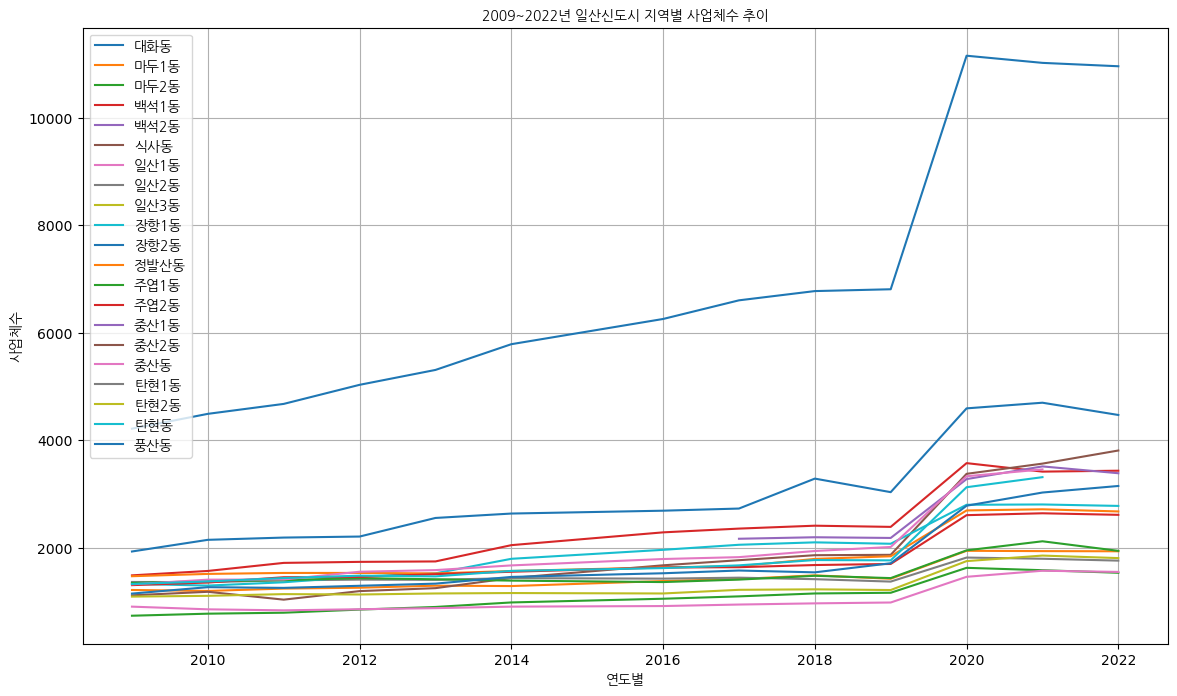

In [26]:
import matplotlib.pyplot as plt

# 데이터프레임 피벗
pivot_df = filtered_sum_df.pivot(index='시점', columns='항목', values='전 산 업')

# Convert column values to strings
pivot_df.columns = pivot_df.columns.astype(str)

# 꺾은선 그래프 그리기
plt.figure(figsize=(14, 8))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=str(column))

plt.title('2009~2022년 일산신도시 지역별 사업체수 추이', fontproperties=fontprop)
plt.xlabel('연도별', fontproperties=fontprop)
plt.ylabel('사업체수', fontproperties=fontprop)
plt.legend(loc='best', prop=fontprop)
plt.grid(True)
plt.show()